# <center>Семинар 3. <br> Используем параболическое приближение по трем точкам <br> чтобы решить задачу с трубой</center>

<center>Задача: мы хотим решить задачу Коши(приближенно) для функции
$$c(x, t) \quad x, t \in \mathbb{R}$$
Нам даны значения функции в начальный момент времени
$$c(x, 0) = c_0(x)$$
Мы рассматриваем функцию на конечном наборе точек - рассматриваем равномерное разбиение по x и по t
$$с_m^n = c(x_m, t_n)$$
</center>
Мы хотим имея некоторый набор значений уметь делать хорошее приближение значения, которое функция будет принимать в какой-то момент времени T. Для этого мы будем послойно генерировать значения (где слой соответствует одному значению t). Используем значения предыдущего слоя чтобы получить следующий. Будем находить значение в каждой точке слоя(x_m+1, t_n+1) используя три значения в предыдущем слое(t_n): соответствующие x_n-1, x_n и x_n+1.

При этом система будет замкнута на себя, то есть мы будем жить в фактор пространстве(по идее можно еще рассматривать фактор множество на разбиении R) R по остатку от деления на L - меру этого пространства(другими словами длина трубы). То есть мы отождествляем x_-1 с последним элементом разбиения, что позволяет нам использовать одинаковые формулы для вычисления всех элементов.

Идея того как получить формулу - это подумать про физический смысл, который в данном случае заключается в движении по замкнутой трубе с постоянной скоростью. Тогда функция в момент времени t+tau отличается от функции во время t сдвигом на u*tau по x, если u - скорость. Поскольку мы имеем только дискретный набор данных в каждый момент времени, нужно приблизить значение попытаясь построить функцию наиболее приближающую поведение функции основываясь на близких точках.

В нашем случае, мы утверждаем что при достаточно малом разбиении tau, x_n - u*tau > x_n-1, поэтому мы используем точки лежащие рядом . Ищем решение в виде полинома
$$c(x, t_n) = \tilde{c}(\tilde{x}) = a_2\tilde{x}^2 + a_1\tilde{x} + a_0,\quad\quad \tilde{x} = x-x_m$$

Подставляя три ближайшие точки в уравнение можно получить следующий результат для интересующей нас точки:

$$ c_m^{n+1} = c(x_m, t_{n+1}) = c(x_m - u\tau, t_n) = (c_{m+1}^n + c_{m-1}^n - 2c_{m}^n)\frac{u^2\tau^2}{2h^2} + (c_{m+1}^n - c_{m-1}^n)\frac{u\tau}{2h} + c_m^n$$

Приступим к выполнению задачи. Сначала введем начальный мусор.

In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
def c_0(x): # функция c(x) в начальный момент времени с прямоугольным графиком (ну как-бы нет, но я не знаю как это называется)
    if 3 < x < 5:
         return 1
    else:
         return 0

In [3]:
L = 10 # размер области в которой определен x
TAU = 0.01 # разбиение по времени
H = 0.01 # разбиение по координате
u = 1 # константа скорости
T = 5 # время для которого требуется найти состояние функции c(x)
A2 = u*u*TAU*TAU/(2*H*H) # коэффициенты в форуле
A1 = u*TAU/(2*H)
print(A2, A1)

0.5 0.5


Теперь введем 2 функции которые будем использовать для удобства

In [4]:
def next_layer(layer, t):
    """
    Вычисляет следующий слой по предыдущему используя формулу
    :param layer: Массив со значениями функции в какой-то момент времени t
    :param t: Время для которого даны значения функции
    :return: Массив со значениями в следующий момент времени
    """
    output = []
    for i in range(len(layer)):
        value = A2*(layer[(i+1)%len(layer)]+layer[i-1]-2*layer[i]) + A1*(layer[i-1]-layer[(i+1)%len(layer)]) + layer[i]
        output.append(value)
    return output

In [5]:
def get_range(interval, total):
    """
    Создает равномерное разбиение от 0 до total с шагом interval.
    Наверное, вы можете просто использовать linspace или что-то другое, но пофиг, я так написал
    :param interval: шаг между соседними значениями
    :param total: Максимальное значение в разбиении
    :return: Массив со значениями от 0 до total, где соседние значения отличаются на значение interval
    """
    return [alpha*interval for alpha in range(math.ceil(int(total/interval)+1))]

Решаем задачу для случая с прямоугольным графиком и рисуем график.

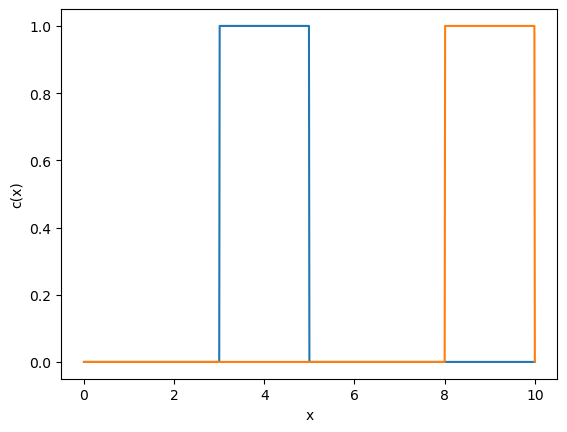

In [6]:
x_range = get_range(H, L) # разбиение, на котором работаем

current_layer = [c_0(x) for x in x_range] # задаем начальное положение с помощью функции c_0

for step in range(1, int(T/TAU)+1):
    current_layer = next_layer(current_layer, step*TAU) # получаем следующий слой необходимое количество раз

plt.plot(x_range, [c_0(x) for x in x_range]) # рисуем синим начальное положение, оранжевым - результат в момент T
plt.plot(x_range, current_layer)

plt.xlabel('x')
plt.ylabel('c(x)')
plt.show()

Теперь мы используем периодическую функцию вместо c_0 и будем сдвигать ее на ее период. Т.е. мы ожидаем, что в итоге значения мало изменятся.

In [7]:
def periodic_func(x): # пример хорошей периодической функции
    return (math.sin(math.pi*x/L))**4

period = L/u # при движении со скоростью u, функция должна возвращаться в начальное положение при таком времени

Мы хотим посмотреть на результат при разных разбиениях(h). А именно мы хотим измерить насколько получаемые значения отличаются от эталонных(в этом случае начальных). Для этого мы используем норму 
$$ E = max|g_i - f_i| $$
Где g - вычисленное решение через период, f - начальное значение 

Поэтому выведем вычисление результата в функцию от разбиения и введем функцию, которая будет вычислять ошибку(E).

In [8]:
def get_solution(x_interval, t_interval):
    """
    Решает нашу задачу для заданной мелкости разбиения
    :param x_interval: Мелкость разбиения по x
    :param t_interval: Мелкость разбиения по t
    :return: Массив с вычесленными значениями c(x) в момент времени = period 
    """
    x_range = get_range(x_interval, L) 
    current_layer = [periodic_func(x) for x in x_range]
    for step in range(1, int(period/t_interval)+1):
        current_layer = next_layer(current_layer, step*t_interval)

    return current_layer
# кому не лень можно подумать почему именно так все написано

In [9]:
def calculate_error(values1, values2):
    """
    Вычисляет величину ошибки между полученным результатом и теоретически верным
    :param values1: Массив вычисленных значений
    :param t_interval: Массив аналитически "правильных" значений
    :return: Значение вычисленной ошибки как максимум модуля поэлементной разности
    """
    return max([abs(values1[i]-values2[i]) for i in range(min(len(values1), len(values2)))])

Посмотрим как выглядят графики

E = 0.04079249836538157


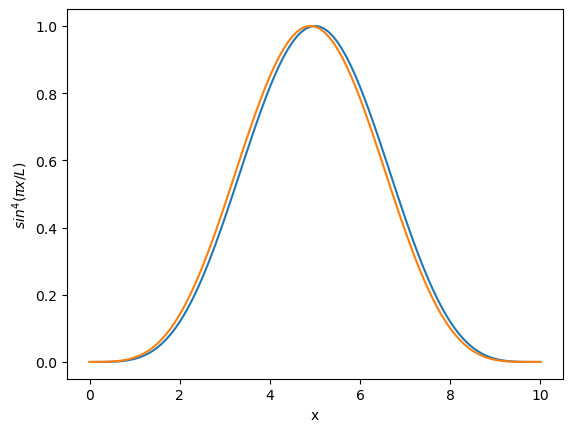

In [10]:
x_range = get_range(0.1, L)
original = [periodic_func(x) for x in x_range]
solution = get_solution(0.1, 0.1)

print("E =", calculate_error(original, solution))

plt.plot(x_range, [periodic_func(x) for x in x_range])
plt.plot(x_range, get_solution(0.1, 0.1))
plt.xlabel('x')
plt.ylabel(r'$sin^4(\pi x/L)$')
plt.show()

Похоже

Найдем зависимость ошибки от мелкости разбиения

In [11]:
intervals = []
errors = []

for interval in get_range(0.001, 1): # зададим для каких интервалов мы хотим вычислять распределение, можете другое поставить
    if interval == 0: # get_range имеет 0 в возращаемых значениях, но он ломает программу, поэтому не будем его использовать 
        continue
        
    solution = get_solution(interval, interval) # зададим равные интервалы по координате и времени и найдем решение 
    error = calculate_error(solution, [periodic_func(x) for x in get_range(interval, L)])
    
    intervals.append(interval) # запишем значения ошибок которые мы получили для каждого интервала
    errors.append(error)

Будем смотреть на модуль логарифма величин, поэтому напишем функцию, которая переведет данные в такой формат

In [12]:
def get_log(array):
    return [abs(math.log(x)) for x in array]

Рисуем график и радуемся

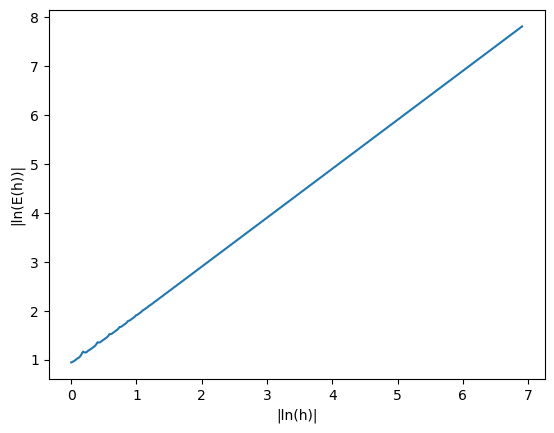

In [13]:
plt.plot(get_log(intervals), get_log(errors))
plt.xlabel('|ln(h)|')
plt.ylabel('|ln(E(h))|')
plt.show()